# CASE: BOMBOM - Advanced Analytics IBM + Vale

## Realizado por: Sabrina Otoni da Silva

## Etapa de tratamento dos outliers

In [1]:
from pathlib import Path

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

In [2]:
datapath = Path('../data')

In [3]:
data_hot = pd.read_csv(f'{datapath}/02_intermediate/data_model_hot_encoded.csv')
data_ordinal = pd.read_csv(f'{datapath}/02_intermediate/data_model_ordinal_encoded.csv')

In [4]:
data_hot['VAR_2_A'] = 1 - data_hot['VAR_2_B'] - data_hot['VAR_2_C']

data_hot['VAR_2_A'] = data_hot['VAR_2_A'].astype(int)
data_hot['VAR_2_B'] = data_hot['VAR_2_B'].astype(int)
data_hot['VAR_2_C'] = data_hot['VAR_2_C'].astype(int)

groups = {
    'A': data_hot[data_hot['VAR_2_A'] == 1],
    'B': data_hot[data_hot['VAR_2_B'] == 1],
    'C': data_hot[data_hot['VAR_2_C'] == 1]
}

In [5]:
data_ordinal['VAR_2'] = data_ordinal['VAR_2'].astype(int)

groups_2 = {
    'A': data_ordinal[data_ordinal['VAR_2'] == 0],
    'B': data_ordinal[data_ordinal['VAR_2'] == 1],
    'C': data_ordinal[data_ordinal['VAR_2'] == 2]
}

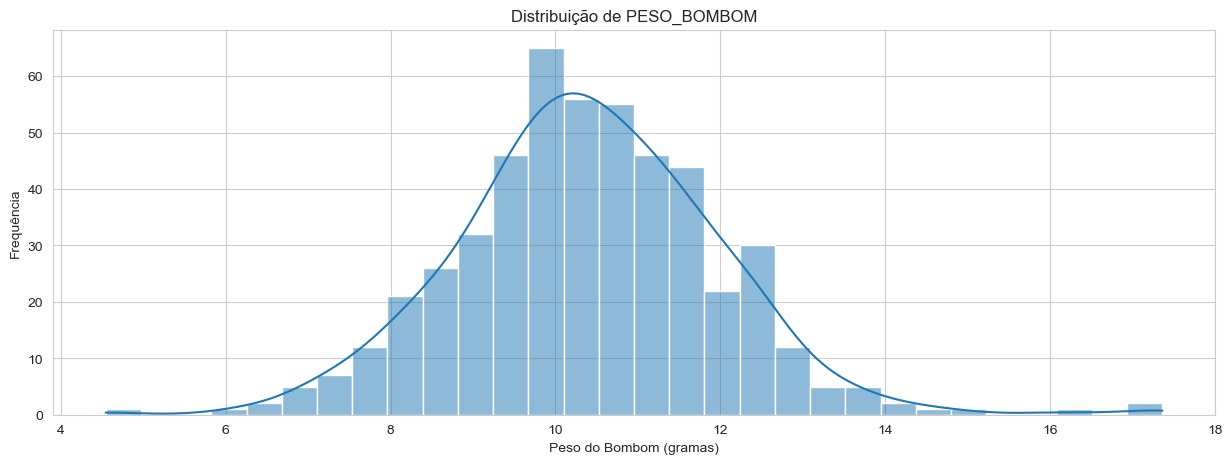

In [6]:
sns.set_style("whitegrid")

plt.figure(figsize=(15, 5))
sns.histplot(data_hot['PESO_BOMBOM'], bins=30, kde=True)
plt.title('Distribuição de PESO_BOMBOM')
plt.xlabel('Peso do Bombom (gramas)')
plt.ylabel('Frequência')
plt.show()

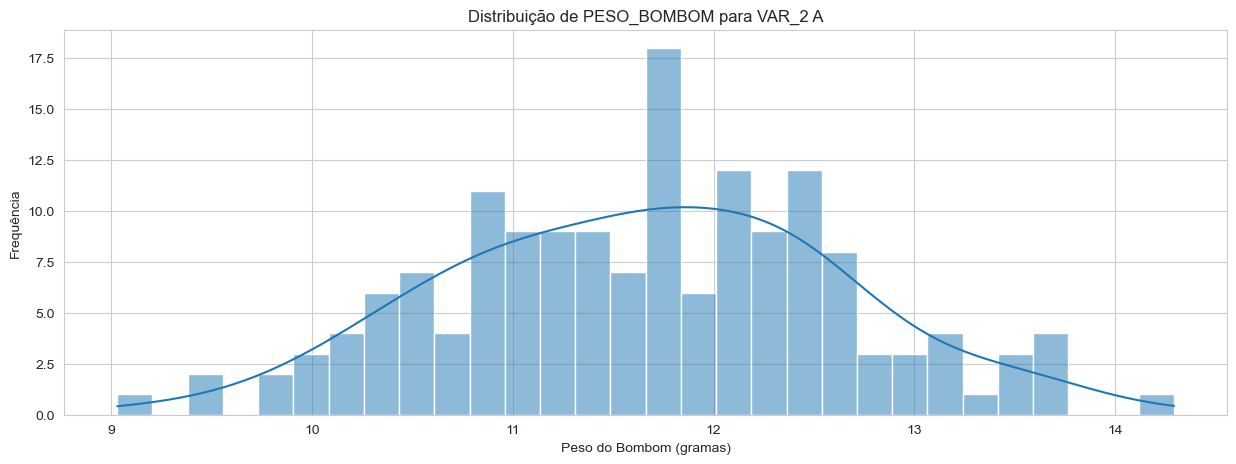

In [7]:
sns.set_style("whitegrid")

plt.figure(figsize=(15, 5))
sns.histplot(data_hot.loc[data_hot['VAR_2_A'] == 1, 'PESO_BOMBOM'], bins=30, kde=True)
plt.title('Distribuição de PESO_BOMBOM para VAR_2 A')
plt.xlabel('Peso do Bombom (gramas)')
plt.ylabel('Frequência')
plt.show()

In [8]:
fig = px.scatter_3d(data_hot[data_hot['VAR_2_A'] == 1], x='VAR_1', y='PESO_BOMBOM', z='QTD_CHOC')
fig.update_traces(marker=dict(size=3))
fig.show()

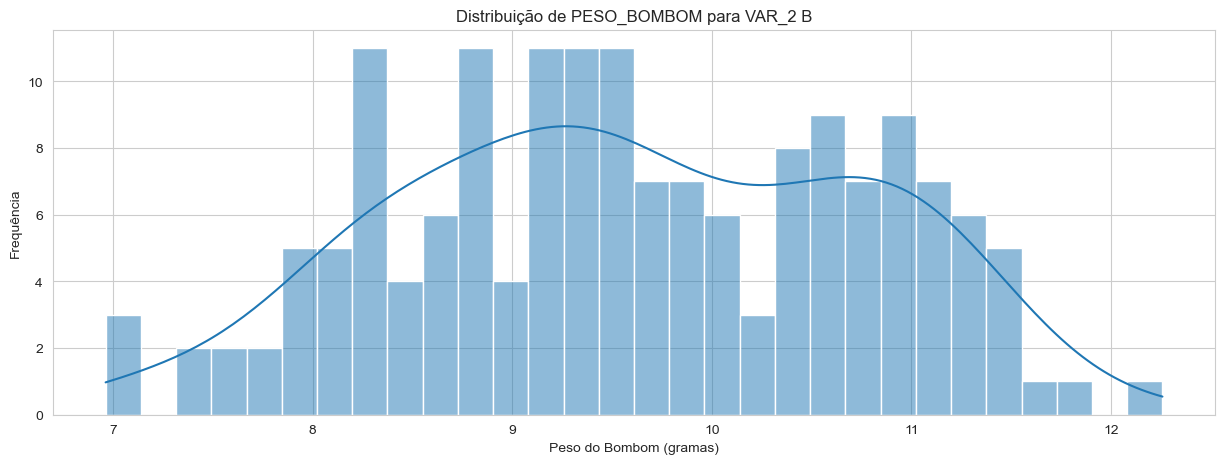

In [9]:
sns.set_style("whitegrid")

plt.figure(figsize=(15, 5))
sns.histplot(data_hot.loc[data_hot['VAR_2_B'] == 1, 'PESO_BOMBOM'], bins=30, kde=True)
plt.title('Distribuição de PESO_BOMBOM para VAR_2 B')
plt.xlabel('Peso do Bombom (gramas)')
plt.ylabel('Frequência')
plt.show()

In [10]:
fig = px.scatter_3d(data_hot[data_hot['VAR_2_B'] == 1], x='VAR_1', y='PESO_BOMBOM', z='QTD_CHOC')
fig.update_traces(marker=dict(size=3))
fig.show()

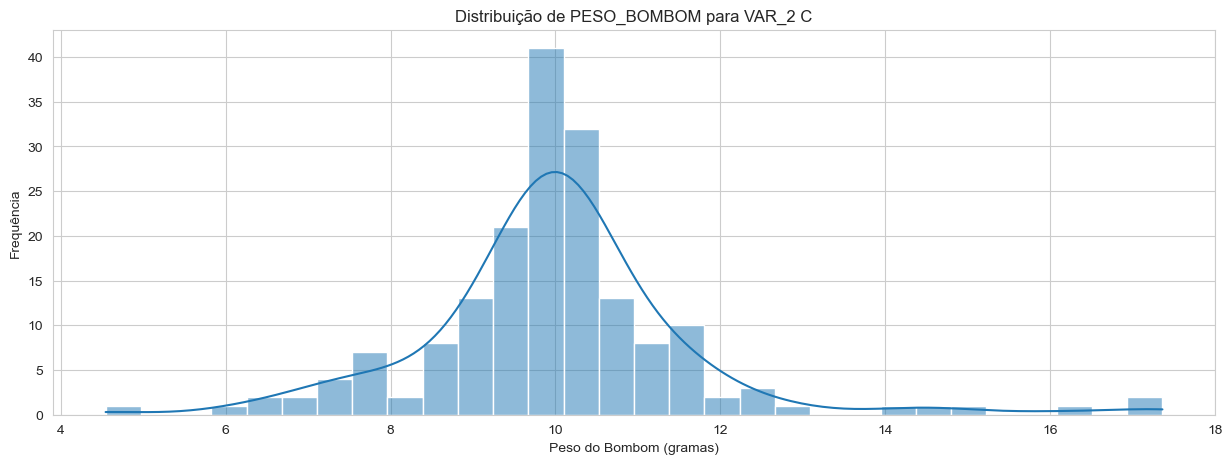

In [11]:
sns.set_style("whitegrid")

plt.figure(figsize=(15, 5))
sns.histplot(data_hot.loc[data_hot['VAR_2_C'] == 1, 'PESO_BOMBOM'], bins=30, kde=True)
plt.title('Distribuição de PESO_BOMBOM para VAR_2 C')
plt.xlabel('Peso do Bombom (gramas)')
plt.ylabel('Frequência')
plt.show()

In [12]:
fig = px.scatter_3d(data_hot[data_hot['VAR_2_C'] == 1], x='VAR_1', y='PESO_BOMBOM', z='QTD_CHOC')
fig.update_traces(marker=dict(size=3))
fig.show()

In [13]:
def adjust_outliers(group, target='PESO_BOMBOM', z_thresh=2):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(group[['QTD_CHOC', 'VAR_1']])

    nn = NearestNeighbors(n_neighbors=20)
    nn.fit(X_scaled)
    _, indices = nn.kneighbors(X_scaled)

    for i in range(len(group)):
        close_neighbors = group.iloc[indices[i][1:]]
        close_neighbors = close_neighbors[(np.abs(close_neighbors['QTD_CHOC'] - group.iloc[i]['QTD_CHOC']) <= 0.99 * group['QTD_CHOC'].std()) &
                                          (np.abs(close_neighbors['VAR_1'] - group.iloc[i]['VAR_1']) <= 0.99 * group['VAR_1'].std())]
        
        if np.abs(group.iloc[i][target] - close_neighbors[target].mean()) > z_thresh * close_neighbors[target].std():
            group.at[group.index[i], target] = close_neighbors[target].mean()

    return group

In [14]:
for group_key in groups:
    groups[group_key] = adjust_outliers(groups[group_key])

corrected_outliers = pd.concat(groups.values(), ignore_index=True)

In [15]:
for group_key in groups_2:
    groups[group_key] = adjust_outliers(groups[group_key])

corrected_outliers_2 = pd.concat(groups_2.values(), ignore_index=True)

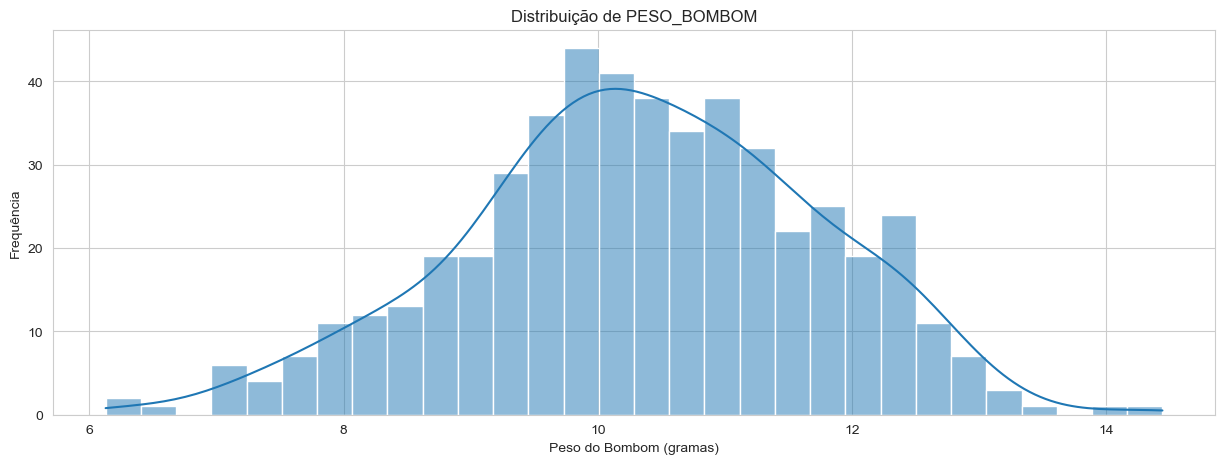

In [16]:
sns.set_style("whitegrid")

plt.figure(figsize=(15, 5))
sns.histplot(corrected_outliers['PESO_BOMBOM'], bins=30, kde=True)
plt.title('Distribuição de PESO_BOMBOM')
plt.xlabel('Peso do Bombom (gramas)')
plt.ylabel('Frequência')
plt.show()

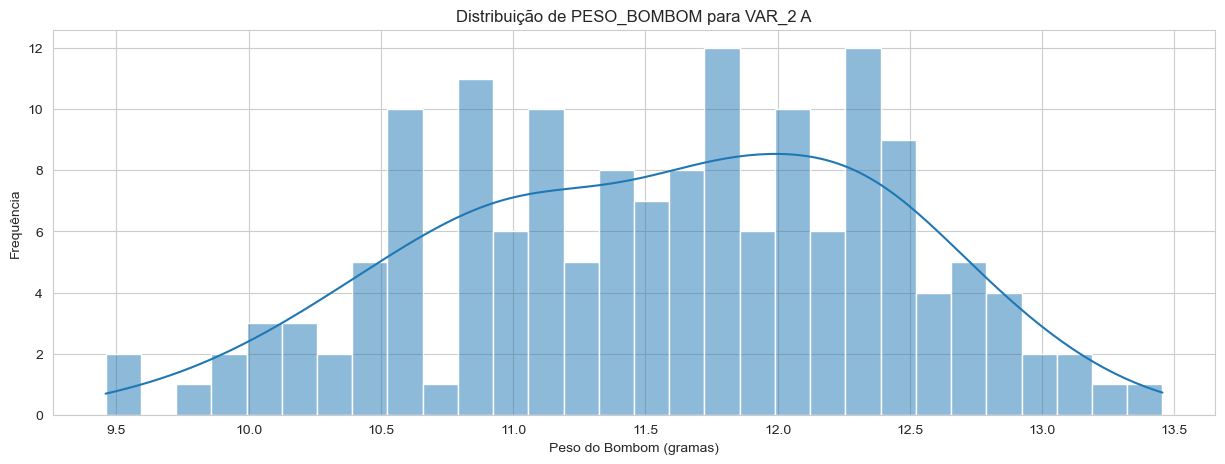

In [17]:
sns.set_style("whitegrid")

plt.figure(figsize=(15, 5))
sns.histplot(corrected_outliers.loc[corrected_outliers['VAR_2_A'] == 1, 'PESO_BOMBOM'], bins=30, kde=True)
plt.title('Distribuição de PESO_BOMBOM para VAR_2 A')
plt.xlabel('Peso do Bombom (gramas)')
plt.ylabel('Frequência')
plt.show()

In [18]:
fig = px.scatter_3d(corrected_outliers[corrected_outliers['VAR_2_A'] == 1], x='VAR_1', y='PESO_BOMBOM', z='QTD_CHOC')
fig.update_traces(marker=dict(size=3))
fig.show()

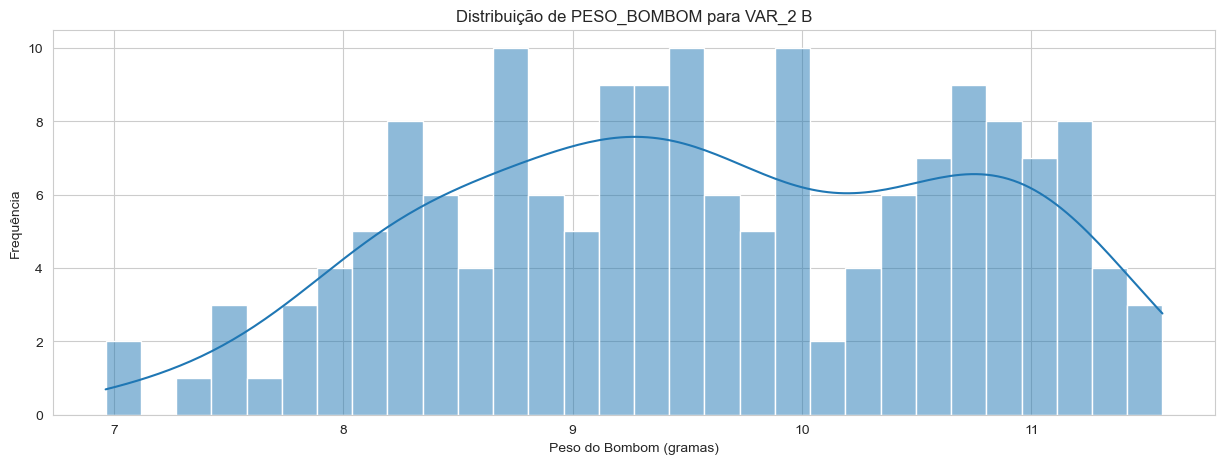

In [19]:
sns.set_style("whitegrid")

plt.figure(figsize=(15, 5))
sns.histplot(corrected_outliers.loc[corrected_outliers['VAR_2_B'] == 1, 'PESO_BOMBOM'], bins=30, kde=True)
plt.title('Distribuição de PESO_BOMBOM para VAR_2 B')
plt.xlabel('Peso do Bombom (gramas)')
plt.ylabel('Frequência')
plt.show()

In [20]:
fig = px.scatter_3d(corrected_outliers[corrected_outliers['VAR_2_B'] == 1], x='VAR_1', y='PESO_BOMBOM', z='QTD_CHOC')
fig.update_traces(marker=dict(size=3))
fig.show()

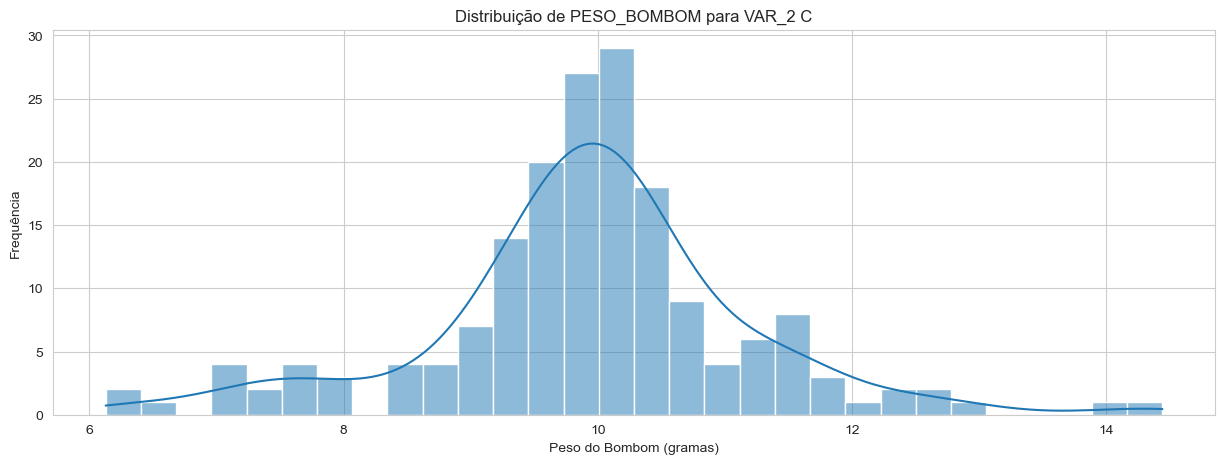

In [21]:
sns.set_style("whitegrid")

plt.figure(figsize=(15, 5))
sns.histplot(corrected_outliers.loc[corrected_outliers['VAR_2_C'] == 1, 'PESO_BOMBOM'], bins=30, kde=True)
plt.title('Distribuição de PESO_BOMBOM para VAR_2 C')
plt.xlabel('Peso do Bombom (gramas)')
plt.ylabel('Frequência')
plt.show()

In [22]:
fig = px.scatter_3d(corrected_outliers[corrected_outliers['VAR_2_C'] == 1], x='VAR_1', y='PESO_BOMBOM', z='QTD_CHOC')
fig.update_traces(marker=dict(size=3))
fig.show()

In [23]:
corrected_outliers.to_csv(f'{datapath}/02_intermediate/data_hot_processed.csv', index=False)
corrected_outliers_2.to_csv(f'{datapath}/02_intermediate/data_ordinal_processed.csv', index=False)